In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.features import Rank2D
from yellowbrick.features import ParallelCoordinates

In [2]:
# Load data into a data frame
# Source: https://www.kaggle.com/mohansacharya/graduate-admissions
admission_df = pd.read_csv('Admission_Predict.csv')

In [3]:
# Check the first few rows of the data frame using head() function
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Check the size of the data frame using shape function
admission_df.shape

(500, 9)

In [5]:
# Check the data types of the variables
admission_df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
# Describe the data
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


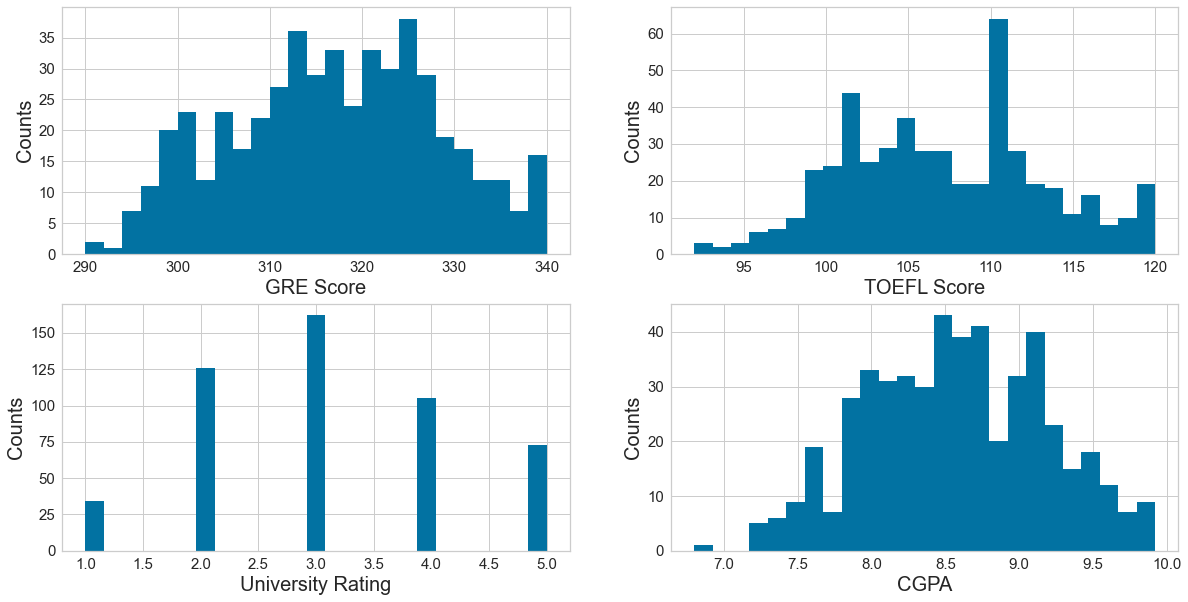

In [7]:
# Create histograms for GRE Score, TOEFL Score, University Rating, and CGPA variables

# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Plot histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(admission_df[num_features[idx]], bins=25)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

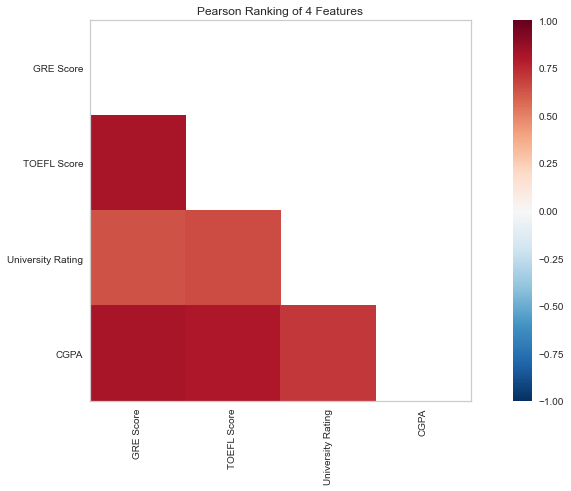

<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

In [8]:
# Pearson Ranking

# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# Extract the featuers of interest from the data frame
X = admission_df[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)          # Transform the data
visualizer.poof()                # Show the data


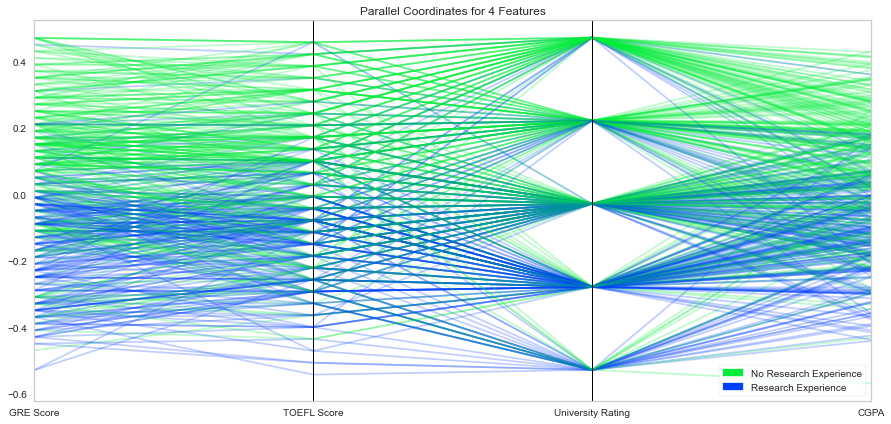

<AxesSubplot:title={'center':'Parallel Coordinates for 4 Features'}>

In [9]:
# Compare variables against Research Yes or No

# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# Specify the features of interest and the classes of the target
classes = ['Research Experience', 'No Research Experience']
num_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA']

# Copy data to a new dataframe
data_norm = admission_df.copy()

# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (admission_df[feature] - admission_df[feature].mean(skipna=True)) / (admission_df[feature].max(skipna=True) - admission_df[feature].min(skipna=True))

# Extract the features of interest from the data frame
X = data_norm[num_features].values
y = admission_df.Research.values

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Show the data


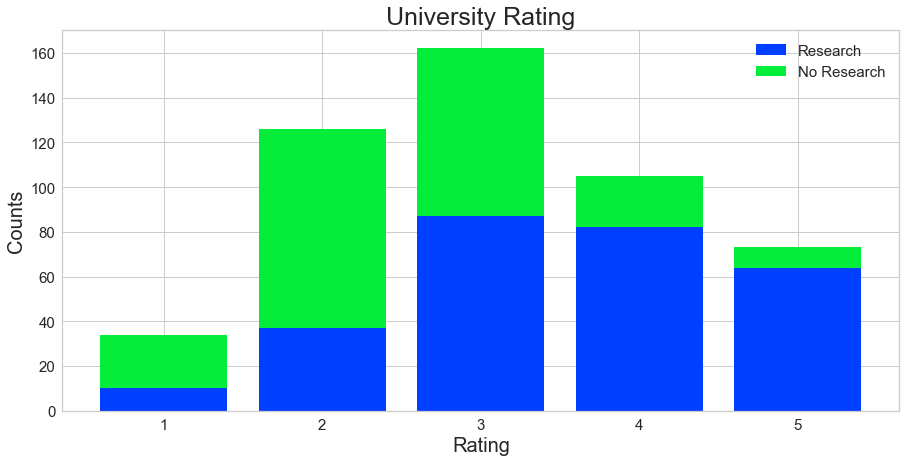

In [10]:
# Stacked bar chart to compare research/no research with University Rating
UR_research = admission_df.replace({'Research': {1: 'Research', 0: 'No-research'}})[admission_df['Research']==1]['University Rating'].value_counts()
UR_no_research = admission_df.replace({'Research': {1: 'Research', 0: 'No-research'}})[admission_df['Research']==0]['University Rating'].value_counts()
UR_no_research = UR_no_research.reindex(index = UR_research.index)

# Bar plot
p1 = plt.bar(UR_research.index, UR_research.values)
p2 = plt.bar(UR_no_research.index, UR_no_research.values, bottom=UR_research.values)
plt.title('University Rating', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend((p1[0], p2[0]), ('Research', 'No Research'), fontsize = 15)
plt.show()

The histograms indicate that the data for GRE Score, TOEFL Score, University Rating, and CGPA variables is mostly in the bell curve shape. The GRE scores can have a maximum value of 340 and most of the data resides between 290 and 340 range. Majority of students had GRE scores between 305 and 330. The TOEFL scores can have a maximum value of 120 and most of the data resides between 90 and 120 range. Majority of students had TOEFL scores between 95 and 150. The University Rating has five values, 1 through 5. Majority of universities had rating between 2 and 4. Most of the data for CGPA resides between 7.2 and 9.9. Majority of students had CGPA between 7.8 and 9.3.

The Pearson Ranking chart indicates that GRE Score, TOEFL Score, University Rating, and CGPA variables had high to medium level of positive correlation with each other.

The Parallel Coordinates Plot for GRE Score, TOEFL Score, University Rating, and CGPA variables against Research Yes or No showed the relationship among the variables and the Research Yes or No was marked in different colors. The plot is very hard to read due to the large number of data points.

The stacked bar plot shows the breakdown of university rating through Research Yes or No. The plot indicates that, higher the university rating, larger the number of research experience counts.

In [11]:
# Check the data frame to see if any columns have any missing values using isna()
admission_df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [12]:
# Check the data frame to see if any columns have any null values using isnull()
admission_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
# Remove column 'Serial No.' as the column consists sequential number and does not add any value to the analysis
del admission_df['Serial No.']

In [14]:
# Check the remaining columns in the dataset
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
# Rename the columns to remove extra space in the variable name and make the variable name meaningful
admission_df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admission'}, inplace=True)

In [16]:
# Create a new variable 'Admission' and populate the values based on the variable 'Chance of Admission'.
# If the 'Chance of Admission' is less than 0.7 then the value is 0, otherwise the value is 1.
admission_df['Admission'] = admission_df['Chance of Admission'].apply(lambda x: 0 if x < 0.7 else 1)

In [17]:
# Describe the data
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admission,Admission
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,0.600000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,0.490389
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,1.000000


My data set does not contain any missing or null values, so they do not need to be filled with methods, such as median value or most represented value. Since the data set is very small (500 records), there are no concerns with performance of the model, and thus no feature selection is needed. The only column that was unnecessary was 'Serial No.' and I deleted that column.

All the variables are independent and no derived variable need to be created using feature extraction.

The data in all columns is evenly spread and the data is not skewed, so no log transformation is neeed. The values in all variables are numeric so there is no need to convert categorical values to numeric values.

I created a new column 'Admission' by converting the values from column 'Chance of Admission'. I would like to try linear regression on 'Chance of Admission' variable and logistic regression on 'Admission' variable to see how both the models perform. 

# Using Logistic Regression for 'Admission' variable

In [18]:
# Combine the numerical features 
features_model = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
data_model_X = admission_df[features_model]

In [19]:
# Check the contents of data_model_X
data_model_X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [20]:
# Create data_model_y for dependent vatiable Admission
data_model_y = admission_df.Admission

# import package to split the data into train and test
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.25, random_state=8)

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [22]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Admission and no-admission
print('\n')
print('No. of Admission and No-Admission in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Admission and No-Admission in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  375
No. of samples in validation set: 125


No. of Admission and No-Admission in the training set:
1    229
0    146
Name: Admission, dtype: int64


No. of Admission and No-Admission in the validation set:
1    71
0    54
Name: Admission, dtype: int64


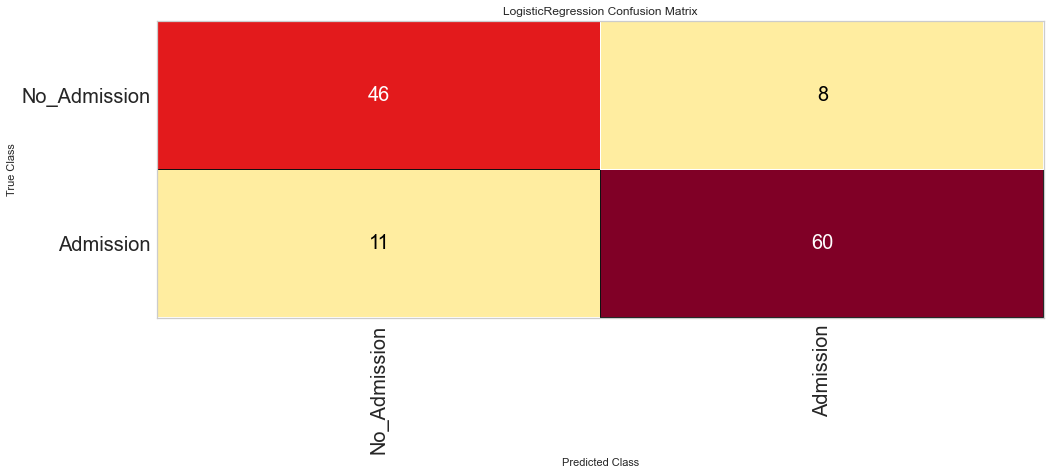

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [32]:
# Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the model 
log_model = LogisticRegression(solver='liblinear')

# Create Confusion Matrix
classes = ['No_Admission','Admission']
cm = ConfusionMatrix(log_model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

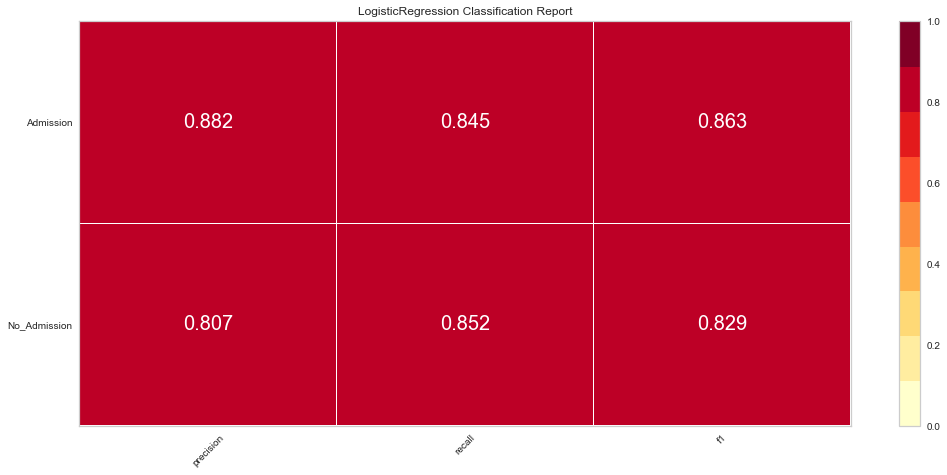

In [33]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(log_model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

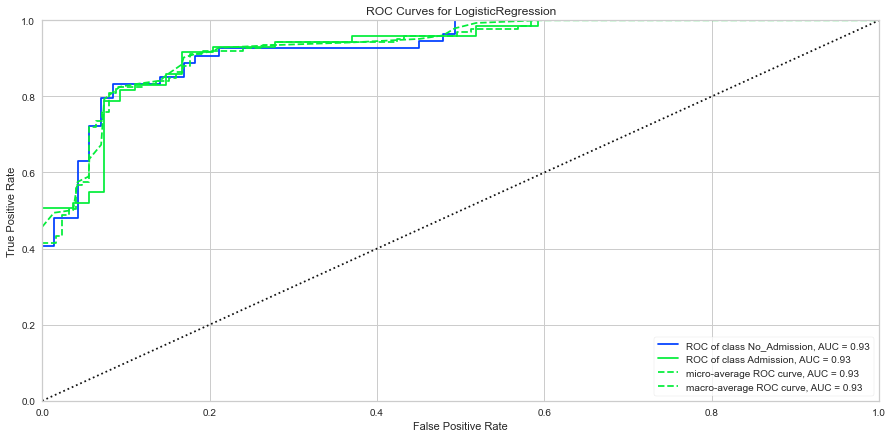

In [34]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(log_model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [35]:
# Use score method to get accuracy of model
score = log_model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.848


In [36]:
# Logistic Regression Hyperparameter tuning using GridSearchCV

#Import RepeatedStratifiedKFold and GridSearchCV 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [37]:
# Set parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.872926 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.870270 (0.047289) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.870270 (0.047289) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.870270 (0.047289) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.870270 (0.047289) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.870270 (0.047289) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.870270 (0.047289) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.870270 (0.047289) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.870270 (0.047289) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: 

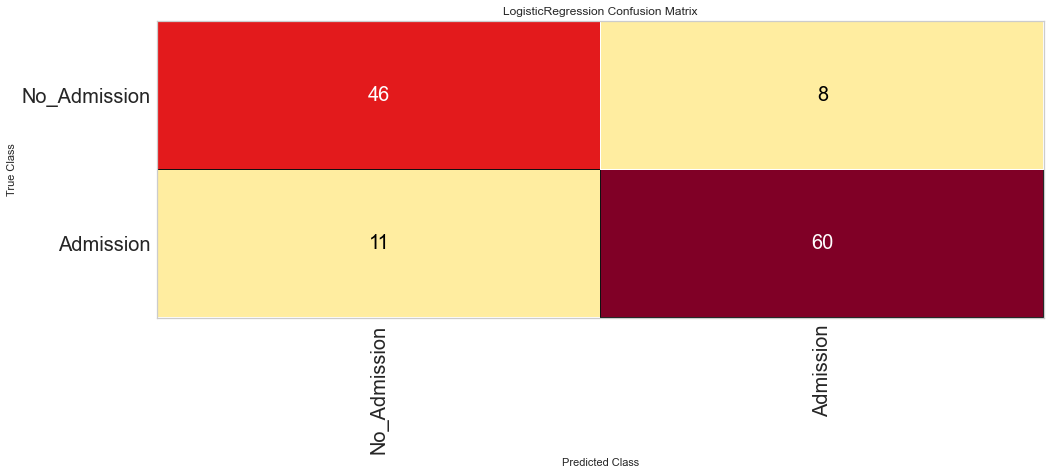

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
# Instantiate the model using best parameters
log_model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')

# Create Confusion Matrix 
classes = ['No_Admission','Admission']
cm = ConfusionMatrix(log_model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

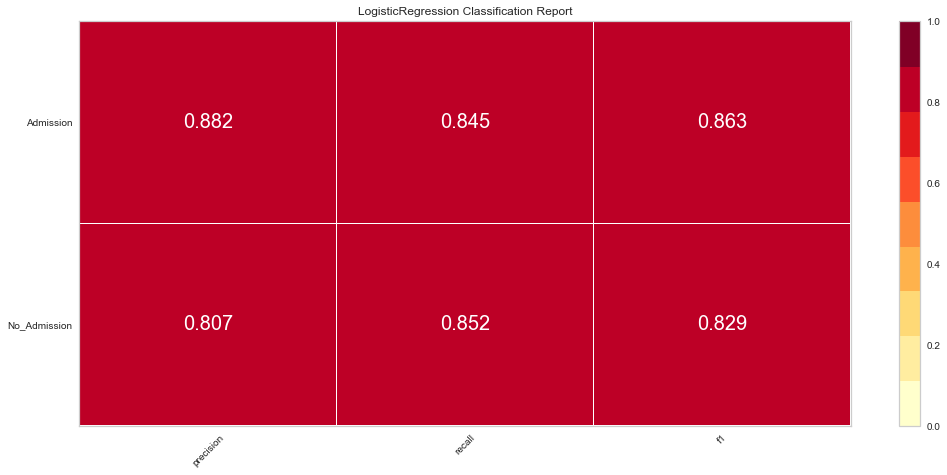

In [39]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(log_model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

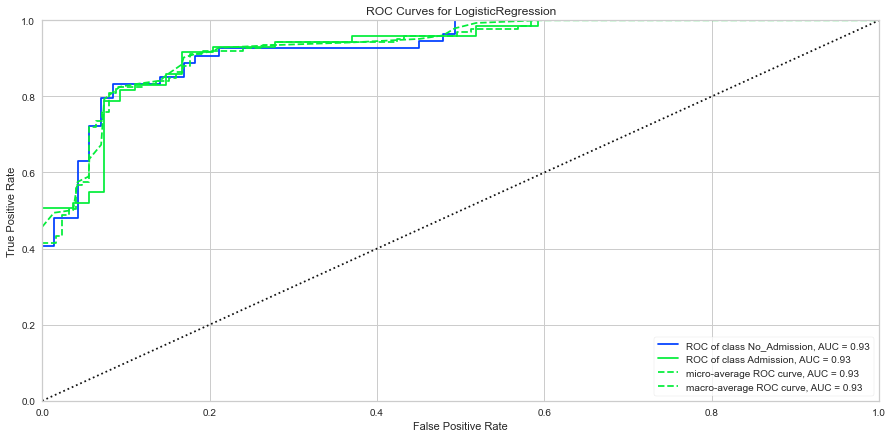

In [40]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(log_model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [41]:
# Use score method to get accuracy of model
score = log_model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.848


# Using Random Forest Classifier for 'Admission' variable

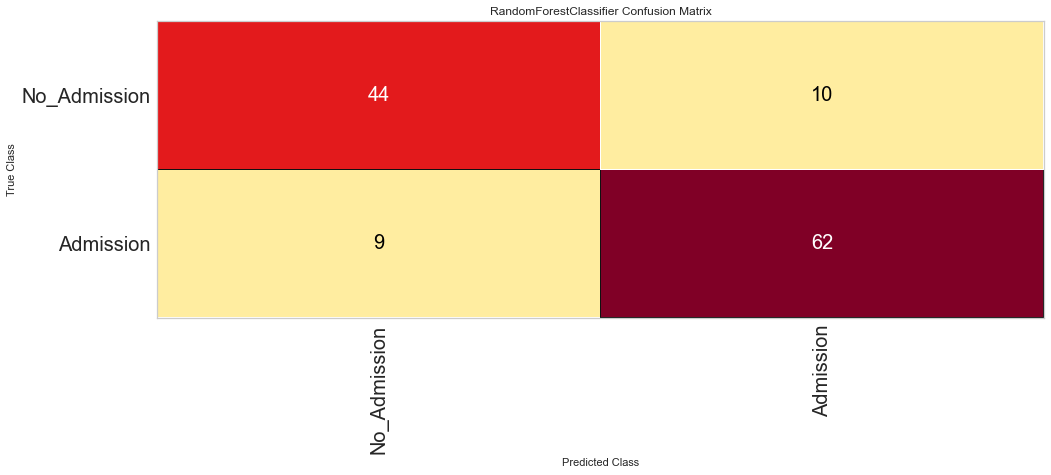

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model 
rf_model = RandomForestClassifier()

# Create Confusion Matrix 
classes = ['No_Admission','Admission']
cm = ConfusionMatrix(rf_model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

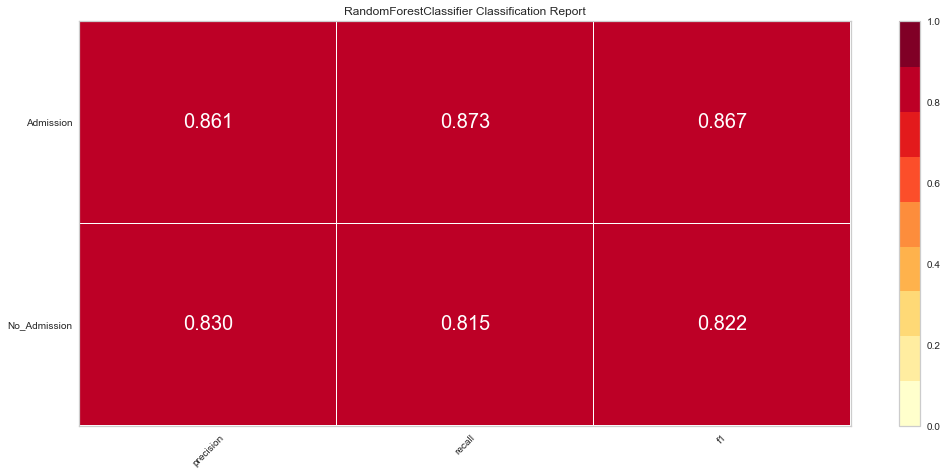

In [43]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(rf_model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

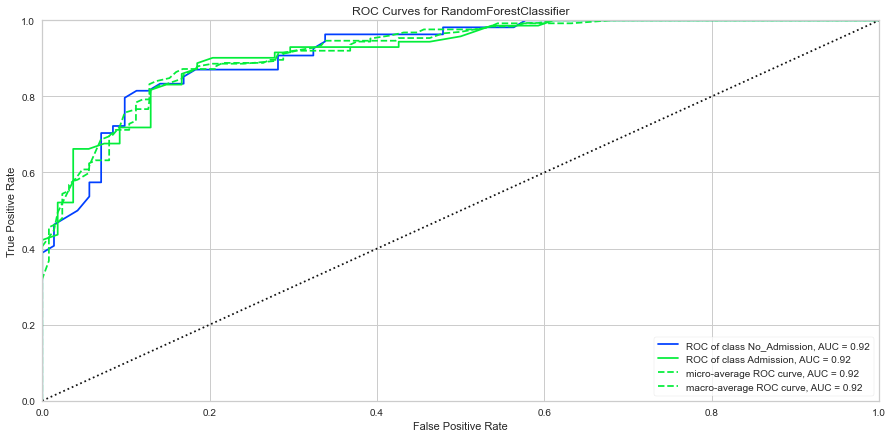

In [44]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(rf_model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [45]:
# Use score method to get accuracy of model
score = rf_model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.848


In [46]:
# Random Forest hyperparameter tuning using RandomizedSearchCV

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [48]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_model_X, data_model_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.0s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=42, verbose=2)

In [50]:
# Find the best parameters
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [51]:
# Create Random Forest Classifier object using best parameters
rf_model = RandomForestClassifier(n_estimators=80,
                                     min_samples_split=10,
                                     min_samples_leaf=4,
                                     max_features='sqrt',
                                     max_depth=50,
                                     bootstrap=True,
                                     random_state=42, 
                                     n_jobs=-1)

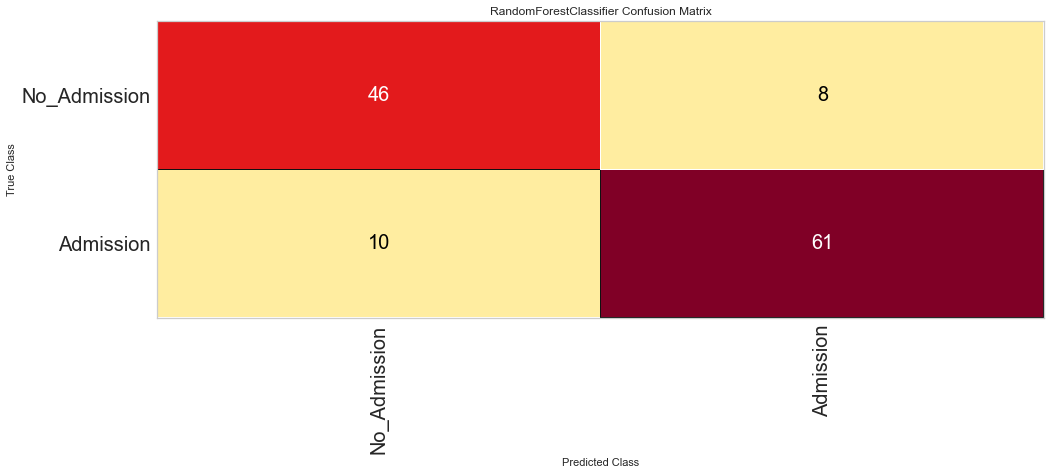

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
# Create Confusion Matrix 
classes = ['No_Admission','Admission']
cm = ConfusionMatrix(rf_model, classes=classes, percent=False)

# Fit the model
cm.fit(X_train, y_train)

# Create confusion matric scores
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

# Display
cm.poof()

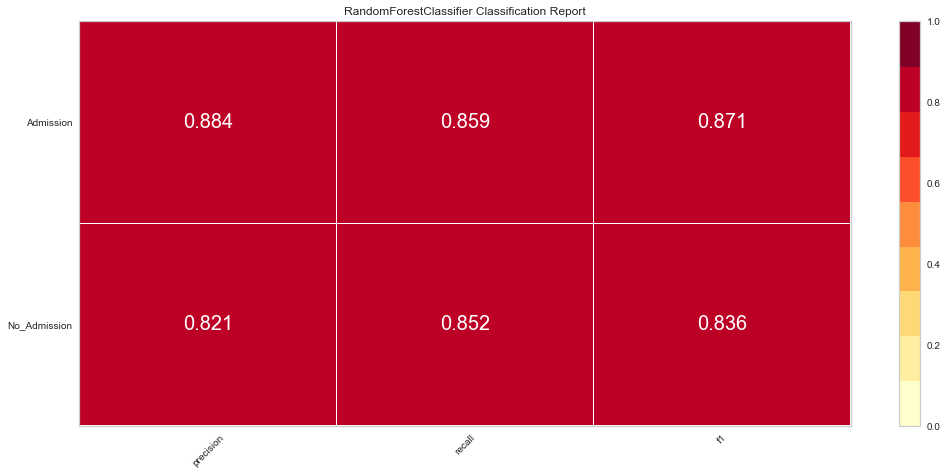

In [53]:
# Precision, Recall, and F1 Score
# Set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(rf_model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

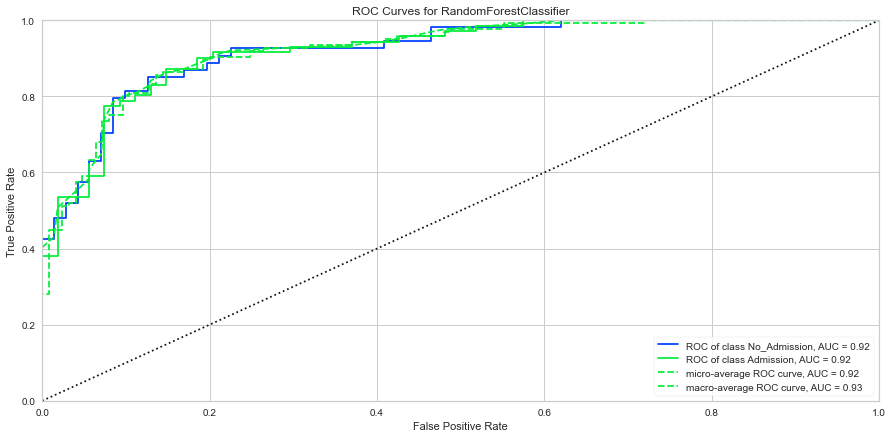

In [54]:
# ROC and AUC

#Instantiate the visualizer
visualizer = ROCAUC(rf_model, classes=classes)

# Fit the training data and evaluate using test data
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)

# Display
g = visualizer.poof()

In [55]:
# Use score method to get accuracy of model
score = rf_model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.856


# Using Random Forest Regression for 'Chance of Admission' variable

In [56]:
# Create data_model_y for dependent vatiable Chance of Admission
data_model_y = admission_df['Chance of Admission']

# import package to split the data into train and test
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.25, random_state=8)

In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [58]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Admission and no-admission
print('\n')
print('No. of Admission and No-Admission in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Admission and No-Admission in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  375
No. of samples in validation set: 125


No. of Admission and No-Admission in the training set:
0.71    18
0.73    16
0.62    13
0.64    13
0.72    12
0.76    12
0.70    11
0.79    11
0.93    10
0.80    10
0.78    10
0.94     9
0.86     9
0.68     9
0.89     9
0.57     8
0.84     8
0.54     8
0.63     7
0.91     7
0.74     7
0.65     7
0.82     7
0.87     7
0.69     7
0.75     7
0.77     7
0.81     6
0.67     6
0.66     6
0.92     6
0.61     6
0.59     5
0.58     5
0.56     5
0.46     5
0.90     5
0.53     5
0.52     5
0.96     5
0.85     5
0.83     4
0.97     4
0.47     4
0.95     4
0.49     3
0.88     3
0.45     3
0.36     2
0.55     2
0.38     2
0.48     2
0.39     1
0.34     1
0.44     1
0.37     1
0.43     1
0.60     1
0.51     1
0.42     1
Name: Chance of Admission, dtype: int64


No. of Admission and No-Admission in the validation set:
0.64    6
0.79    5
0.71    5
0.67    5
0.74    5
0.78    5
0.65    5
0.90    4
0.72    4
0.94    4
0.68    4

In [59]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
# Create Random Forest Regression object
randomforest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [63]:
# Train the model
RFmodel = randomforest.fit(X_train, y_train)

In [64]:
# Create prediction
y_pred = RFmodel.predict(X_val)

In [65]:
# Evaluate the algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 0.04670864000000022
Mean Squared Error: 0.0044230757567999745
Root Mean Squared Error: 0.06650620840793718


In [66]:
# Define function to evaluate model and return accuracy
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [67]:
# Calculate accuracy
accuracy = evaluate(randomforest, X_val, y_val)

Model Performance
Average Error: 0.0467 degrees.
Accuracy = 92.41%.


In [68]:
# Random Forest hyperparameter tuning using RandomizedSearchCV

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [69]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [70]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_model_X, data_model_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    9.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.0s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=42, verbose=2)

In [72]:
# Find the best parameters
rf_random.best_params_

{'n_estimators': 140,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [73]:
# Create Random Forest Regressor object using best parameters
randomforest = RandomForestRegressor(n_estimators=140,
                                     min_samples_split=5,
                                     min_samples_leaf=4,
                                     max_features='sqrt',
                                     max_depth=80,
                                     bootstrap=True,
                                     random_state=42, 
                                     n_jobs=-1)

In [74]:
# Train the model
RFmodel = randomforest.fit(X_train, y_train)

In [75]:
# Create prediction
y_pred = RFmodel.predict(X_val)

In [76]:
# Evaluate the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 0.04665744145455759
Mean Squared Error: 0.0043565122621818655
Root Mean Squared Error: 0.06600388066001775


In [77]:
# Calculate accuracy
accuracy = evaluate(randomforest, X_val, y_val)

Model Performance
Average Error: 0.0467 degrees.
Accuracy = 92.39%.


# Using Ridge Regression for 'Chance of Admission' variable

In [78]:
# Import ridge regression
from sklearn.linear_model import Ridge

In [79]:
# Create Ridge Regression Object
RRmodel = Ridge()

In [80]:
# Train the model
RRmodel.fit(X_train, y_train)

Ridge()

In [81]:
# Create prediction
y_pred = RRmodel.predict(X_val)

In [82]:
# Evaluate the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 0.046441537824992274
Mean Squared Error: 0.004247784415496716
Root Mean Squared Error: 0.06517502907936994


In [83]:
# Calculate accuracy
accuracy = evaluate(RRmodel, X_val, y_val)

Model Performance
Average Error: 0.0464 degrees.
Accuracy = 92.40%.


In [86]:
# Ridge Regression hyperparameter tuning using RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

#Define model
model = Ridge()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X, y)

In [87]:
# Find the best parameters
result.best_params_

{'alpha': 1.5861930349860782e-05,
 'fit_intercept': True,
 'normalize': True,
 'solver': 'sag'}

In [88]:
# Create Ridge Regression Object
RRmodel = Ridge(solver='sag', alpha = 1.5861930349860782e-05, fit_intercept=True, normalize=True)

In [89]:
# Train the model
RRmodel.fit(X_train, y_train)

Ridge(alpha=1.5861930349860782e-05, normalize=True, solver='sag')

In [90]:
# Create prediction
y_pred = RRmodel.predict(X_val)

In [91]:
# Evaluate the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 0.046451563289463454
Mean Squared Error: 0.004248930542263047
Root Mean Squared Error: 0.06518382116954365


In [92]:
# Calculate accuracy
accuracy = evaluate(RRmodel, X_val, y_val)

Model Performance
Average Error: 0.0465 degrees.
Accuracy = 92.40%.
